# Brainstorm Questions
* What are the characteristics of Hall of Famers?
* What separates people who get inducted vs people who were simply nominated?
* What are the characteristics of players with the highest salaries? Did these characteristics change with the advent of Moneyball/Sabermetrics?
* How do high salary vs HoF differ?
* Did people play more positions in the past?

## Salary 
* Players with high salaries are usually on multi-year contracts.
* For a given year, a player's current salary is dictated by past performance prior to signing that contract. 
* Let Year_Start the starting season for a player's contract, Year_End the ending season for a player's contract. Stats accumulated during [Year_Start, Year_End] do not have an effect on their current salary.
* A player may be more motivated to play well closer to Year_End.
* If looking for features that correlate with salary, best to look at data for years prior to that contract signing.

## Hall of Fame 
* I guess that the Hall of Fame will reward players with high-performance over a long period of time.
* The Hall of Fame currently describes baseball as having four eras:
  * Today's Game (1988–present)
  * Modern Baseball (1970–1987)
  * Golden Days (1950–1969)
  * Early Baseball (1871–1949)
* The characteristics for being a Hall of Famer may differ between these eras.
* Some players will have careers that span different eras.
* Players are currently inducted into the Hall through election either by the Baseball Writers' Association of America (BBWAA), or the Veterans Committee, which now consists of four subcommittees. Each of those subcommittees focus on a specific era of baseball (outlined above).
* The Veterans Committee provides a path to enshirement for players who are no longer eligible for consideration by the BBWAA.
* Each player needs to have played at least 10 seasons.
* There are 247 inducted players.
* There are 941 non-inducted players in the dataset.

### VotedBy
* In the dataset, votedBy Old Timers refers to the Old-Timers Committee. This was the original Veterans Committee, formed by Commissioner Landis to put players from the 19th century in the Hall of Fame.
* By 1953, the Old-Timers Committee hadn't met for seven years, so a Committee on Baseball Veterans was formed. This is what votedBy Veterans means.
* Run off elections occur when the initial voting by the BBWAA doesn't produce a winner. This is what votedBy Run Off means.
* There is a special committee to consider players who played in the Negro League. This is what votedBy Negro League means.

### Who are all the Hall of Fame Players?
There is a table called HallOfFame. Join that with Master to get the names

In [253]:
import pandas as pd
import numpy as np
import seaborn as sns

from IPython.display import display

%pylab inline
pd.set_option('display.max_columns', None)

Populating the interactive namespace from numpy and matplotlib


In [228]:
hof_df = pd.read_csv('baseballdatabank-master/core/HallOfFame.csv')
master_df = pd.read_csv('baseballdatabank-master/core/Master.csv')

hof_cols = list(hof_df.columns)
hof_cols.extend(['nameLast', 'nameFirst'])

hof_df = hof_df.merge(master_df, on='playerID')
hof_df = hof_df[hof_cols]

hof_df.head()

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,nameLast,nameFirst
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN,Cobb,Ty
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN,Ruth,Babe
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN,Wagner,Honus
3,wagneho01,1936,Veterans,78.0,59.0,5.0,N,Player,NaN,Wagner,Honus
4,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN,Mathewson,Christy


In [251]:
players = hof_df.loc[(hof_df.category == 'Player')]
inducted_players = hof_df.loc[(hof_df.inducted == 'Y') & (hof_df.category == 'Player')]

In [250]:
display(inducted_players.votedBy.unique())

inducted_players.groupby('votedBy').size().sort_values(ascending=False)

array(['BBWAA', 'Old Timers', 'Special Election', 'Veterans', 'Run Off',
       'Negro League'], dtype=object)

votedBy
BBWAA               116
Veterans             72
Old Timers           25
Run Off               3
Negro League          3
Special Election      2
dtype: int64

In [233]:
def display_votes_by_type(df):
    for voted_by_type in df.votedBy.unique():
        votes_for_type = df.loc[df.votedBy == voted_by_type]
        print(votes_for_type.shape)
        display(votes_for_type.head(80))    

display_votes_by_type(inducted_players)

(116, 11)


,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,nameLast,nameFirst
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN,Cobb,Ty
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN,Ruth,Babe
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN,Wagner,Honus
4,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN,Mathewson,Christy
5,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN,Johnson,Walter
8,lajoina01,1937,BBWAA,201.0,151.0,168.0,Y,Player,NaN,Lajoie,Nap
10,speaktr01,1937,BBWAA,201.0,151.0,165.0,Y,Player,NaN,Speaker,Tris
13,youngcy01,1937,BBWAA,201.0,151.0,153.0,Y,Player,NaN,Young,Cy
18,hornsro01,1942,BBWAA,233.0,175.0,182.0,Y,Player,NaN,Hornsby,Rogers
25,cochrmi01,1947,BBWAA,161.0,121.0,128.0,Y,Player,NaN,Cochrane,Mickey


(25, 11)


,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,nameLast,nameFirst
41,colliji01,1945,Old Timers,NaN,NaN,NaN,Y,Player,NaN,Collins,Jimmy
53,bresnro01,1945,Old Timers,NaN,NaN,NaN,Y,Player,NaN,Bresnahan,Roger
60,ansonca01,1939,Old Timers,NaN,NaN,NaN,Y,Player,NaN,Anson,Cap
63,ewingbu01,1939,Old Timers,NaN,NaN,NaN,Y,Player,NaN,Ewing,Buck
72,wadderu01,1946,Old Timers,NaN,NaN,NaN,Y,Player,NaN,Waddell,Rube
80,delahed01,1945,Old Timers,NaN,NaN,NaN,Y,Player,NaN,Delahanty,Ed
97,walshed01,1946,Old Timers,NaN,NaN,NaN,Y,Player,NaN,Walsh,Ed
103,radboch01,1939,Old Timers,NaN,NaN,NaN,Y,Player,NaN,Radbourn,Old Hoss
114,kellyki01,1945,Old Timers,NaN,NaN,NaN,Y,Player,NaN,Kelly,King
140,jennihu01,1945,Old Timers,NaN,NaN,NaN,Y,Player,NaN,Jennings,Hughie


(2, 11)


,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,nameLast,nameFirst
46,gehrilo01,1939,Special Election,NaN,NaN,NaN,Y,Player,NaN,Gehrig,Lou
2706,clemero01,1973,Special Election,NaN,NaN,NaN,Y,Player,NaN,Clemente,Roberto


(80, 11)


,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,nameLast,nameFirst
147,rusieam01,1977,Veterans,NaN,NaN,NaN,Y,Player,NaN,Rusie,Amos
168,youngro01,1972,Veterans,NaN,NaN,NaN,Y,Player,NaN,Youngs,Ross
242,clarkjo01,1963,Veterans,NaN,NaN,NaN,Y,Player,NaN,Clarkson,John
271,schalra01,1955,Veterans,NaN,NaN,NaN,Y,Player,NaN,Schalk,Ray
299,wardjo01,1964,Veterans,NaN,NaN,NaN,Y,Player,NaN,Ward,John
306,hamilbi01,1961,Veterans,NaN,NaN,NaN,Y,Player,NaN,Hamilton,Billy
323,bendech01,1953,Veterans,NaN,NaN,NaN,Y,Player,NaN,Bender,Chief
345,roushed01,1962,Veterans,NaN,NaN,NaN,Y,Player,NaN,Roush,Edd
350,becklja01,1971,Veterans,NaN,NaN,NaN,Y,Player,NaN,Beckley,Jake
369,keefeti01,1964,Veterans,NaN,NaN,NaN,Y,Player,NaN,Keefe,Tim


(3, 11)


,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,nameLast,nameFirst
482,gehrich01,1949,Run Off,187.0,NaN,159.0,Y,Player,1st,Gehringer,Charlie
1507,ruffire01,1967,Run Off,306.0,NaN,266.0,Y,Player,1st,Ruffing,Red
1898,applilu01,1964,Run Off,201.0,NaN,189.0,Y,Player,1st,Appling,Luke


(21, 11)


,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,nameLast,nameFirst
1881,paigesa01,1971,Negro League,NaN,NaN,NaN,Y,Player,NaN,Paige,Satchel
2665,gibsojo99,1972,Negro League,NaN,NaN,NaN,Y,Player,NaN,Gibson,Josh
2667,leonabu99,1972,Negro League,NaN,NaN,NaN,Y,Player,NaN,Leonard,Buck
2708,irvinmo01,1973,Negro League,NaN,NaN,NaN,Y,Player,NaN,Irvin,Monte
2765,bellco99,1974,Negro League,NaN,NaN,NaN,Y,Player,NaN,Bell,Cool Papa
2799,johnsju99,1975,Negro League,NaN,NaN,NaN,Y,Player,NaN,Johnson,Judy
2819,charlos99,1976,Negro League,NaN,NaN,NaN,Y,Player,NaN,Charleston,Oscar
2871,dihigma99,1977,Negro League,NaN,NaN,NaN,Y,Player,NaN,Dihigo,Martin
2872,lloydpo99,1977,Negro League,NaN,NaN,NaN,Y,Player,NaN,Lloyd,Pop
3859,brownra99,2006,Negro League,NaN,NaN,NaN,Y,Player,NaN,Brown,Ray


In [234]:
inducted_players.head()

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,nameLast,nameFirst
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN,Cobb,Ty
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN,Ruth,Babe
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN,Wagner,Honus
4,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN,Mathewson,Christy
5,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN,Johnson,Walter


In [235]:
non_inducted_ids = set(players.playerID).difference(inducted_players.playerID)
non_inducted_players = players.loc[hof_df.playerID.isin(non_inducted_ids)]

non_inducted_players = non_inducted_players.groupby('playerID', as_index=False).last()

non_inducted_players

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,nameLast,nameFirst
0,abbotji01,2005,BBWAA,516.0,387.0,13.0,N,Player,NaN,Abbott,Jim
1,adamsba01,1955,BBWAA,251.0,189.0,24.0,N,Player,Top 20,Adams,Babe
2,adamsbo03,1966,BBWAA,302.0,227.0,1.0,N,Player,NaN,Adams,Bobby
3,adamssp01,1960,BBWAA,269.0,202.0,1.0,N,Player,NaN,Adams,Sparky
4,ageeto01,1979,BBWAA,432.0,324.0,0.0,N,Player,NaN,Agee,Tommie
5,aguilri01,2006,BBWAA,520.0,390.0,3.0,N,Player,NaN,Aguilera,Rick
6,akerja01,1980,BBWAA,385.0,289.0,0.0,N,Player,NaN,Aker,Jack
7,alexado01,1995,BBWAA,460.0,345.0,0.0,N,Player,NaN,Alexander,Doyle
8,allenbe01,1979,BBWAA,432.0,324.0,0.0,N,Player,NaN,Allen,Bernie
9,allendi01,1997,BBWAA,473.0,353.0,79.0,N,Player,NaN,Allen,Dick


In [236]:
inducted_players.shape

(247, 11)

In [237]:
non_inducted_players.shape

(941, 11)

In [249]:
appearances = pd.read_csv("baseballdatabank-master/core/Appearances.csv")
appearances.head()

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,BS1,NaN,barnero01,31.0,NaN,31,31.0,0,0,0,16,0,15,0,0,0,0,NaN,NaN,NaN
1,1871,BS1,NaN,barrofr01,18.0,NaN,18,18.0,0,0,0,1,0,0,13,0,4,17,NaN,NaN,NaN
2,1871,BS1,NaN,birdsda01,29.0,NaN,29,29.0,0,7,0,0,0,0,0,0,27,27,NaN,NaN,NaN
3,1871,BS1,NaN,conefr01,19.0,NaN,19,19.0,0,0,0,0,0,0,18,0,1,18,NaN,NaN,NaN
4,1871,BS1,NaN,gouldch01,31.0,NaN,31,31.0,0,0,30,0,0,0,0,0,1,1,NaN,NaN,NaN


In [239]:
appearances_total = appearances.groupby('playerID', as_index=False).sum()

del appearances_total['yearID']
appearances_total.head()

,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,aardsda01,331.0,0.0,139,331.0,331,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1,aaronha01,3298.0,288.0,3298,3057.0,0,0,210,43,7,0,313,293,2184,2760,196.0,46.0,0.0
2,aaronto01,437.0,NaN,437,437.0,0,0,232,7,10,0,136,1,2,138,NaN,NaN,NaN
3,aasedo01,448.0,0.0,81,448.0,448,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
4,abadan01,15.0,4.0,15,9.0,0,0,8,0,0,0,0,0,1,1,0.0,7.0,1.0


In [240]:
inducted_players = pd.merge(inducted_players, appearances_total, on='playerID')
inducted_players.head()

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,nameLast,nameFirst,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN,Cobb,Ty,3034.0,NaN,3034,3034.0,3,0,14,2,1,0,35,2194,706,2934,NaN,NaN,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN,Ruth,Babe,2503.0,NaN,2503,2503.0,163,0,32,0,0,0,1057,64,1131,2241,NaN,NaN,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN,Wagner,Honus,2794.0,NaN,2794,2794.0,2,0,248,57,210,1887,35,67,272,373,NaN,NaN,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN,Mathewson,Christy,647.0,NaN,647,647.0,636,0,3,0,0,0,1,0,3,4,NaN,NaN,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN,Johnson,Walter,934.0,NaN,934,934.0,802,0,0,0,0,0,2,7,4,13,NaN,NaN,NaN


In [241]:
non_inducted_players = pd.merge(non_inducted_players, appearances_total, on='playerID')
non_inducted_players.head()

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,nameLast,nameFirst,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,abbotji01,2005,BBWAA,516.0,387.0,13.0,N,Player,NaN,Abbott,Jim,263.0,13.0,18,263.0,263,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1,adamsba01,1955,BBWAA,251.0,189.0,24.0,N,Player,Top 20,Adams,Babe,482.0,NaN,482,482.0,482,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,adamsbo03,1966,BBWAA,302.0,227.0,1.0,N,Player,NaN,Adams,Bobby,1281.0,NaN,1281,1281.0,0,0,12,399,652,0,0,0,3,3,NaN,NaN,NaN
3,adamssp01,1960,BBWAA,269.0,202.0,1.0,N,Player,NaN,Adams,Sparky,1424.0,NaN,1424,1424.0,0,0,0,551,532,297,2,0,2,4,NaN,NaN,NaN
4,ageeto01,1979,BBWAA,432.0,324.0,0.0,N,Player,NaN,Agee,Tommie,1129.0,NaN,1129,1129.0,0,0,0,0,0,0,64,934,124,1073,NaN,NaN,NaN


In [242]:
def plot_total_games(df, title):
    ax = df['G_all'].hist(bins=50)
    ax.set_xlabel("Total games played")
    ax.set_ylabel("Count")
    ax.set_title(title)

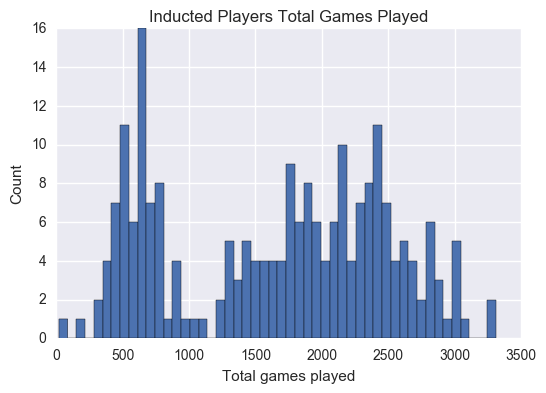

In [243]:
plot_total_games(inducted_players, "Inducted Players Total Games Played")

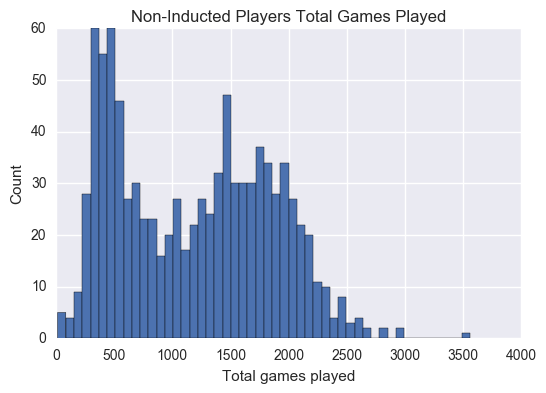

In [244]:
plot_total_games(non_inducted_players, "Non-Inducted Players Total Games Played")

* Inducted players may have longer careers
* Both distributions look like they could be bimodal. My guess is that this is because pitchers appear in fewer games per season compared to batters.
* We should look at these distributions by position.

In [245]:
position_cols = ['G_p',
 'G_c',
 'G_1b',
 'G_2b',
 'G_3b',
 'G_ss',
 'G_lf',
 'G_cf',
 'G_rf',
 'G_of',
 'G_dh',
 'G_ph',
 'G_pr']

def most_played_position(df):
    return df[position_cols].idxmax(axis=1).str.split('_').str[1].str.upper()

In [247]:
inducted_players.insert(1, 'Position', most_played_position(inducted_players))
non_inducted_players.insert(1, 'Position', most_played_position(non_inducted_players))